<a href="https://colab.research.google.com/github/nathlia/Aulas2023/blob/RECUPERA%C3%87%C3%83O-DE-INFORMA%C3%87%C3%83O-E-PERSONALIZA%C3%87%C3%83O-NA-WEB-(DPADP0152)/Entrega3_Part2_nathalia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### tech

In [ ]:
import os

# Path to your Google Drive directory
google_drive_path_tech = '/content/drive/MyDrive/Colab Notebooks/tech'

# List the files and subdirectories in your Google Drive directory
file_list_tech = os.listdir(google_drive_path_tech)

# Count the number of files
file_count = len(file_list_tech)

# Print the count
print(f"Number of files in your Google Drive directory: {file_count}")

Number of files in your Google Drive directory: 401


In [ ]:
# select and read 10 random files
sample_texts_tech = file_list_tech
# sample_texts = random.sample(file_list, 100)

docs_tech = []
for fname in sample_texts_tech:
    with open(google_drive_path_tech + '/' + fname , "r", encoding="ISO-8859-1") as file:
        text = file.read()
    docs_tech.append(text)

print("Finished reading files in:", google_drive_path_tech)

Finished reading files in: /content/drive/MyDrive/Colab Notebooks/tech


### business

In [ ]:
import os

# Path to your Google Drive directory
google_drive_path_b = '/content/drive/MyDrive/Colab Notebooks/business'

# List the files and subdirectories in your Google Drive directory
file_list_b = os.listdir(google_drive_path_b)

# Count the number of files
file_count_B = len(file_list_b)

# Print the count
print(f"Number of files in your Google Drive directory: {file_count}")

Number of files in your Google Drive directory: 401


In [ ]:
# select and read 10 random files
sample_texts_b = file_list_b
# sample_texts = random.sample(file_list, 100)

docs_business = []
for fname in sample_texts_b:
    with open(google_drive_path_b + '/' + fname , "r", encoding="ISO-8859-1") as file:
        text = file.read()
    docs_business.append(text)

print("Finished reading files in:", google_drive_path_b)

Finished reading files in: /content/drive/MyDrive/Colab Notebooks/business


### modelo

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Pré-processamento de texto
nltk.download('stopwords')
nltk.download('punkt')

# Carregar stopwords em Português
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score

# Function to read and label the data
def read_and_label(folder_path, label):
    documents = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), "r", encoding="utf-8") as file:
                content = file.read()
                documents.append((content, label))
    return documents


# Read and label the data
documents_tech = read_and_label(google_drive_path_tech, "tech")
documents_business = read_and_label(google_drive_path_b, "business")

# Combine and preprocess the data
data = documents_tech + documents_business
df = pd.DataFrame(data, columns=["text", "label"])

# Separate features (X) and target (y)
X = df["text"]
y = df["label"]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
# model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate Cohen's Kappa score
kappa = cohen_kappa_score(y_test, y_pred)
print("Kappa Score:", kappa)


Accuracy: 1.0
Confusion Matrix:
[[102   0]
 [  0  81]]
Kappa Score: 1.0


In [ ]:
# Combine the documents with their class labels
combined_docs = [(doc, "Tech") for doc in docs_tech] + [(doc, "Business") for doc in docs_business]

# Print the combined dataset
for i, (doc, label) in enumerate(combined_docs, 1):
    print(f"Document {i}: {doc[:50]}...   Class: {label}")

In [ ]:
print(df)

                                                  text     label
0    ITunes user sues Apple over iPod\n\nA user of ...      tech
1    Poles play with GameBoy 'blip-pop'\n\nA group ...      tech
2    UK pioneers digital film network\n\nThe world'...      tech
3    Format wars could 'confuse users'\n\nTechnolog...      tech
4    EU software patent law delayed\n\nControversia...      tech
..                                                 ...       ...
906  Economy 'strong' in election year\n\nUK busine...  business
907  WorldCom bosses' $54m payout\n\nTen former dir...  business
908  Giving financial gifts to children\n\nYour chi...  business
909  Man Utd to open books to Glazer\n\nManchester ...  business
910  Argentina, Venezuela in oil deal\n\nArgentina ...  business

[911 rows x 2 columns]


In [ ]:
# Converter coluna categórica em numérica - chamada dummie que assume valores entre 0 e 1
df = pd.get_dummies(df, columns=["label"])

# Exibir o DataFrame após o pré-processamento
print(df)


                                                  text  label_business  \
0    ITunes user sues Apple over iPod\n\nA user of ...               0   
1    Poles play with GameBoy 'blip-pop'\n\nA group ...               0   
2    UK pioneers digital film network\n\nThe world'...               0   
3    Format wars could 'confuse users'\n\nTechnolog...               0   
4    EU software patent law delayed\n\nControversia...               0   
..                                                 ...             ...   
906  Economy 'strong' in election year\n\nUK busine...               1   
907  WorldCom bosses' $54m payout\n\nTen former dir...               1   
908  Giving financial gifts to children\n\nYour chi...               1   
909  Man Utd to open books to Glazer\n\nManchester ...               1   
910  Argentina, Venezuela in oil deal\n\nArgentina ...               1   

     label_tech  
0             1  
1             1  
2             1  
3             1  
4             1  
.. 

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=["text"])
y = df["text"]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
X_tfidf = vectorizer.fit_transform(X)


# Train the model (use your preferred model)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the decision tree if needed
# ...

# Print details of correct and incorrect predictions
# ...

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate Cohen's Kappa score
kappa = cohen_kappa_score(y_test, y_pred)
print("Kappa Score:", kappa)

Accuracy: 1.0
Confusion Matrix:
[[102   0]
 [  0  81]]
Kappa Score: 1.0


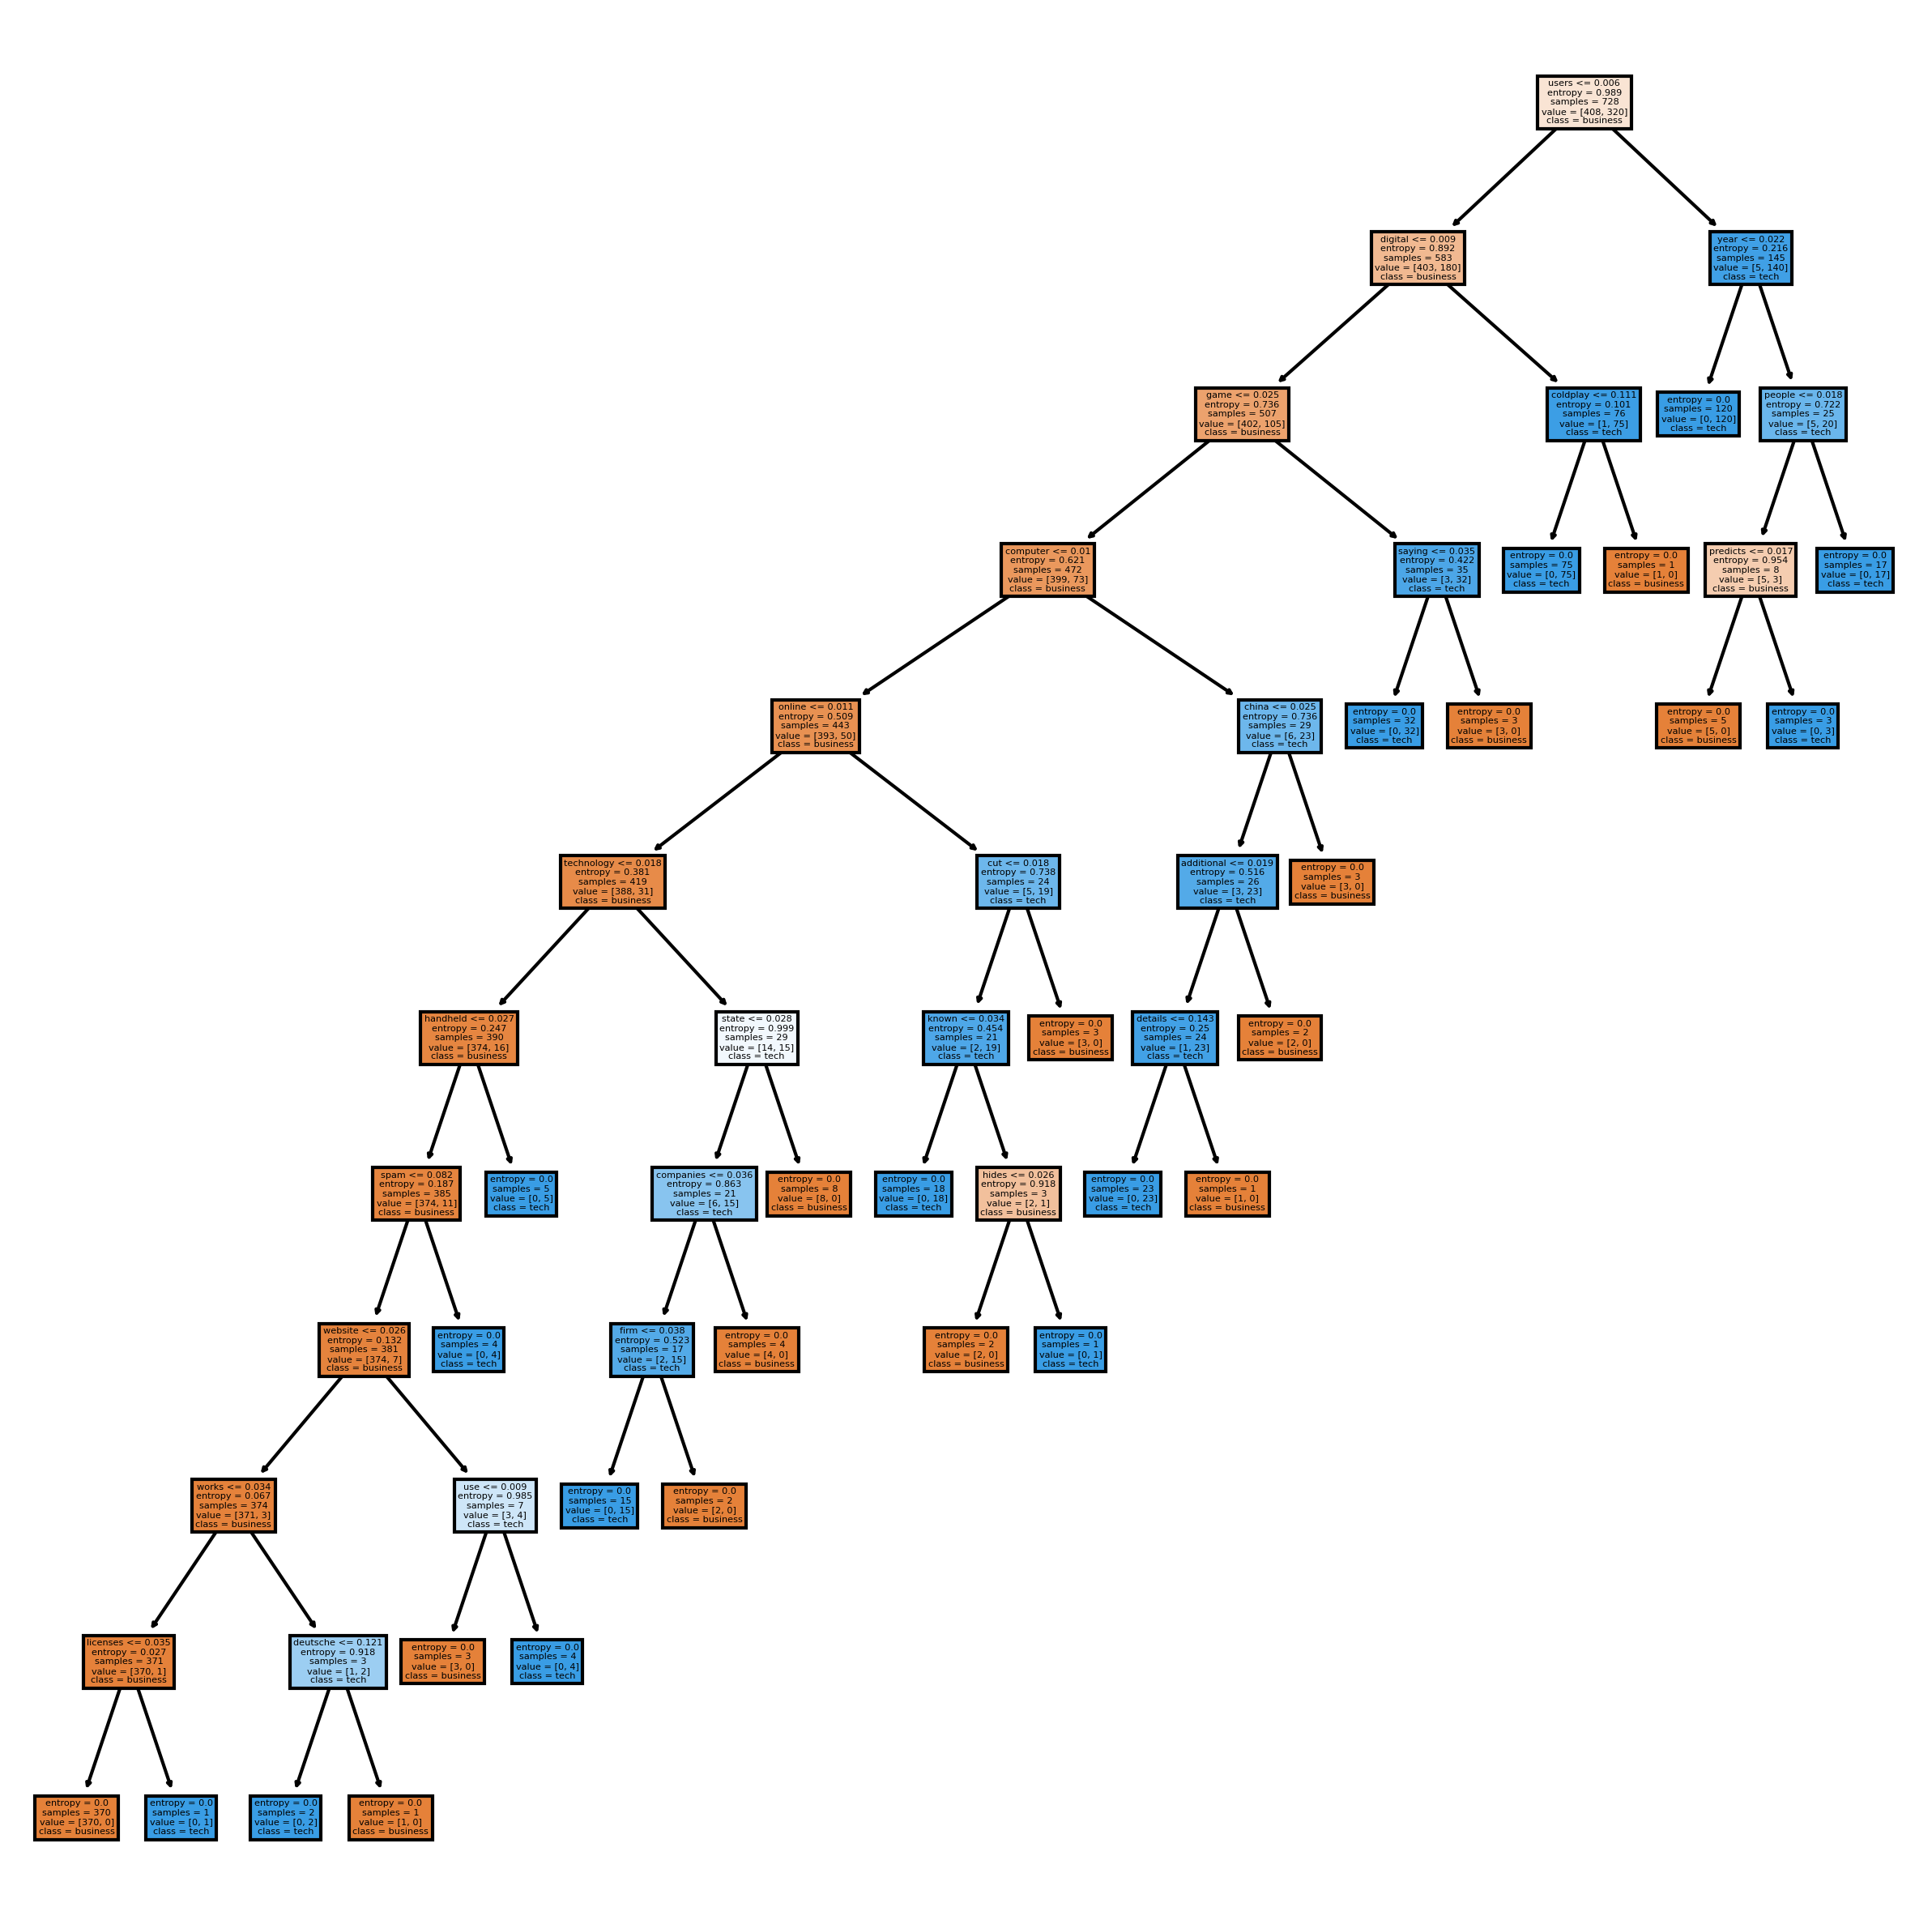

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from matplotlib import pyplot as plt
from sklearn import tree

# Train the model (use your preferred model)
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

# Visualize the decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=300)
tree.plot_tree(model, feature_names=vectorizer.get_feature_names_out(), class_names=model.classes_, filled=True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Visualize one of the decision trees in the forest (e.g., the first tree)
tree_to_visualize = rf_model.estimators_[0]

# Visualize the decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(40, 40), dpi=300)
tree.plot_tree(tree_to_visualize, feature_names=vectorizer.get_feature_names_out(), class_names=rf_model.classes_, filled=True)
plt.show()
